<h2>Objective:</h2>

- Develop a Machine learning model using Linear Regression 
- The model will be able to detect treatment Charges on the basis of Medical Report.

<h3>Import following libraries:</h3>

- Numpy
- Pandas
- MatPlotLib
- SciKit Learn
- SeaBorn

 Using  Python 3.11.9<br>
 From terminal install following packages<br>
 python -m pip install -U numpy<br>
 python -m pip install -U pandas<br>
 python -m pip install -U matplotlib<br>
 python -m pip install -U scikit-learn<br>
 similarly other required 

In [1]:
import pandas as pd
import numpy as np

Import dataset from the link given below:

source of dataset : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

Adding Dataset using Pandas library 

In [2]:
df = pd.read_csv("C:\GEN1_AI\Dataset\Machine_Learning\medical-charges.csv")

<h2>About the Dataset

<h4>The dataset is about people who smokes and who don't. On the basis of this dataset the model will be able to predict the person medical charges of the basis of his/her age, sex, bmi, smokers, region belonging to, etc. 


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The information about dataset is given below, which contains number of coloums - rows, datatype, memory usage, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The shape of DataFrame is like it contains, rows = 1338 and colums = 7.

In [5]:
df.shape

(1338, 7)

The describe function is used for calculating statistical data like count, mean, min, max, which is very important to understand about the data.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The dataset we are using, contains Zero null values, which helps to model predict more accuratly.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as mlt
import seaborn as sb 


Decide basic parameters for the graph and stats we are going to use, parameter like font_size, figure_size, colour, etc.

In [9]:

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [10]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Creating a Histogram of age.

If you observe the graph of age, nunber of people of age 18 and 19 is almost double than other, other all age group has almost similar nunber of people. The more the steady graph the more accurate result we will get.

In [11]:
fig = px.histogram(df,
                   x='age', 
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

Creating a Histogram of BMI (Body Mass Index).

If you observe the graph of BMI, the graph first increase and decrease in the same way. If you know BMI, Body Mass Index is a medical screening tool that estimates body fat percentage by calculating the ratio of person's weight to height.

The graph is created by using Plotly library, it makes more interactive graph.

As I said, the graph is uneven which is not good to train the model. We need to handle this, before we use to train the model.

In [12]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout (width=800, height=600, bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout (width=800, height=600, bargap=0.1)
fig.show()

In [14]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
fig = px.histogram(df, x='smoker', 
            color='sex',
            color_discrete_sequence=['skyblue', 'darkcyan'],
            title='Smoker')
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()


In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
fig = px.histogram(df, x='region', 
            color='sex',
            color_discrete_sequence=['salmon', 'dimgrey'],
            title='Smoker')
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()


In [18]:
fig = px.scatter(df, 
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()

In [19]:
fig = px.scatter(df, 
                x='bmi',
                y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI v/s Charges')
fig.update_traces(marker_size=5)
fig.update_layout(width=800, height=600, bargap=0.02)
fig.show()

In [20]:
px.violin(df, x='children', y='charges').update_layout(width=800, height=600, bargap=0.02)

In [21]:
df.charges.corr(df.age)

np.float64(0.2990081933306478)

In [22]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362887)

In [23]:
df.charges.corr(df.children)


np.float64(0.06799822684790487)

In [24]:
df['smoker'] = df['smoker'].map({"yes":1, "no":0})

In [25]:
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
df.charges.corr(df.smoker)

np.float64(0.7872514304984778)

In [27]:

df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

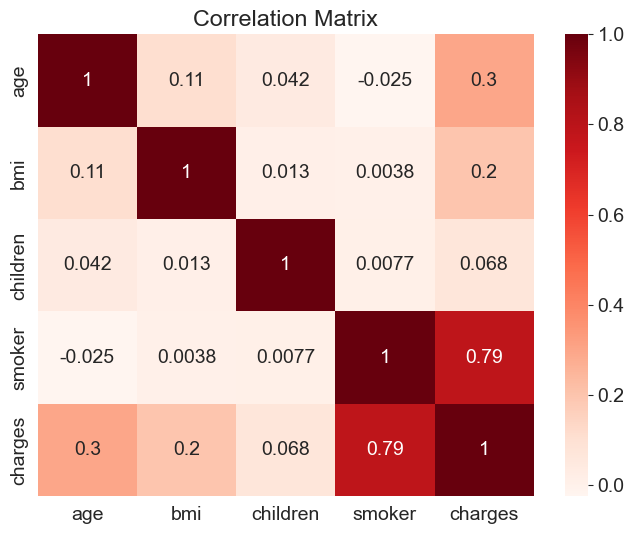

In [28]:
sb.set_style("whitegrid")
mlt.figure(figsize=(8, 6))
sb.heatmap(df_numeric.corr(), cmap='Reds', annot=True)
mlt.title('Correlation Matrix')

In [29]:
non_smoker_df = df[df.smoker == 0]

In [30]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


[Text(0.5, 1.0, 'Age v/s Charges')]

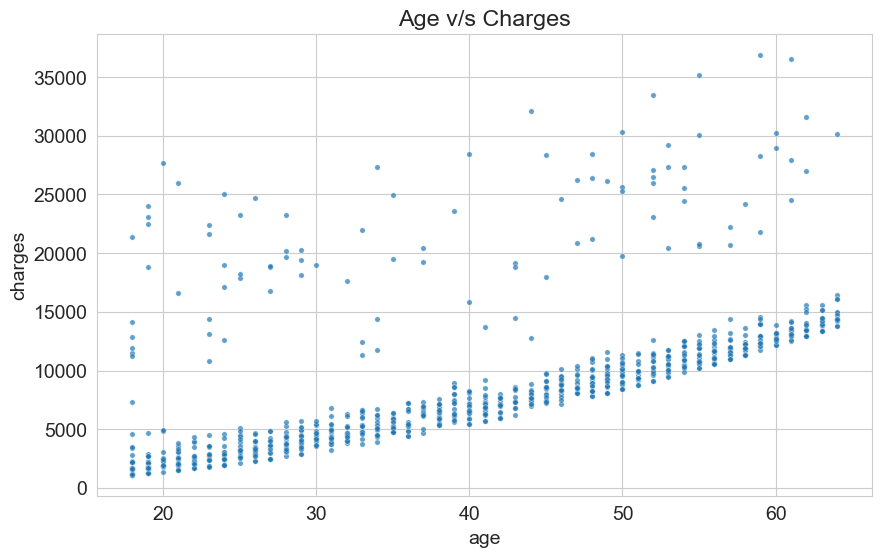

In [31]:

sb.scatterplot(data = non_smoker_df, x='age', y='charges', alpha=0.7, s=15).set(title ='Age v/s Charges')

In [32]:
def estimate_charges(age, w, b):
    return w * age + b

In [33]:
w = 250
b = -2000

In [34]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [35]:
ages.shape

(1064,)

In [36]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [37]:
estimate_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

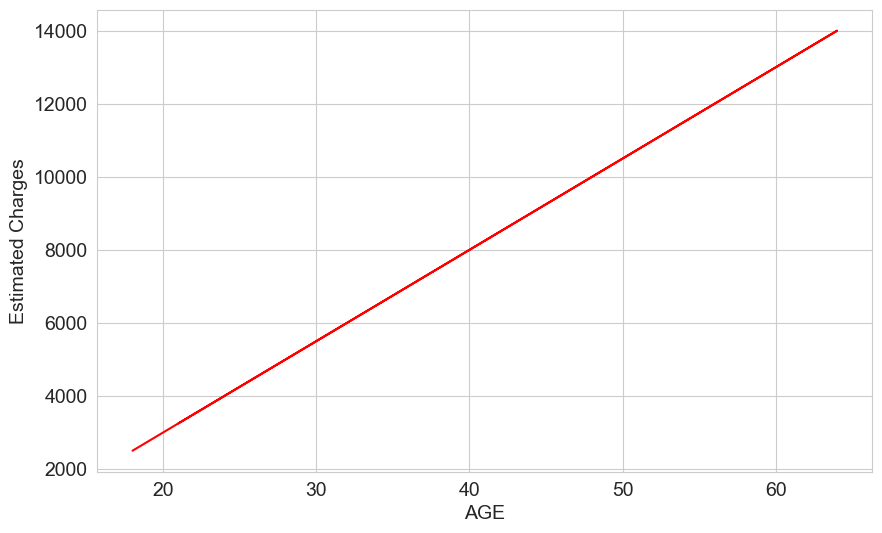

In [38]:
mlt.plot(ages, estimate_charges, 'r-')
mlt.xlabel('AGE')
mlt.ylabel('Estimated Charges')

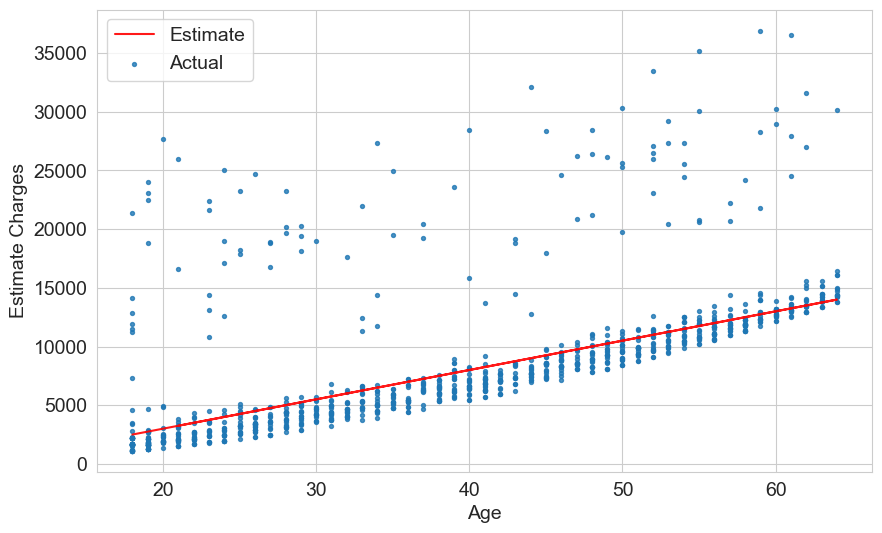

In [39]:
target = non_smoker_df.charges

mlt.plot(ages, estimate_charges, 'r', alpha=0.9)

mlt.scatter(ages, target, s=8, alpha=0.8)
mlt.xlabel('Age')
mlt.ylabel('Estimate Charges')
mlt.legend(['Estimate', 'Actual'])

In [40]:
def try_parameters(w, b):
    ages = non_smoker_df.age 
    target = non_smoker_df.charges

    mlt.plot(ages, estimate_charges, 'r', alpha=0.9)
    mlt.scatter(ages, target, s=8, alpha=0.8)
    mlt.xlabel('Age')
    mlt.ylabel('Charges')
    mlt.legend(['Estimate', 'Actual'])

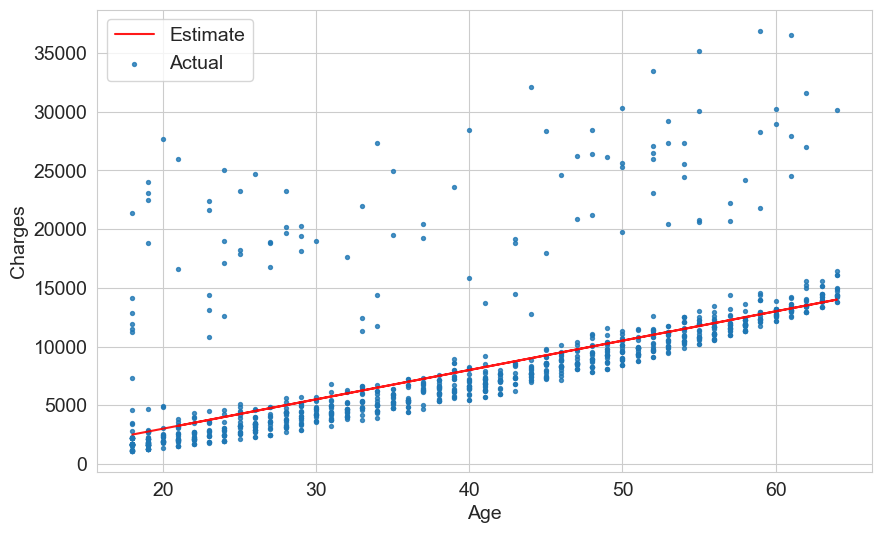

In [41]:
try_parameters(250, -2000)

In [42]:
targets  = non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [43]:
predictions = estimate_charges
predictions


1        2500
2        5000
3        6250
4        6000
5        5750
        ...  
1332    11000
1333    10500
1334     2500
1335     2500
1336     3250
Name: age, Length: 1064, dtype: int64

In [44]:
predicted = non_smoker_df.age * w + b

In [45]:
import numpy as np

In [46]:
def rmse(targets, estimate_charges):
    return np.sqrt(np.mean(np.square(targets - estimate_charges)))

In [47]:
w = 250
b = -2000

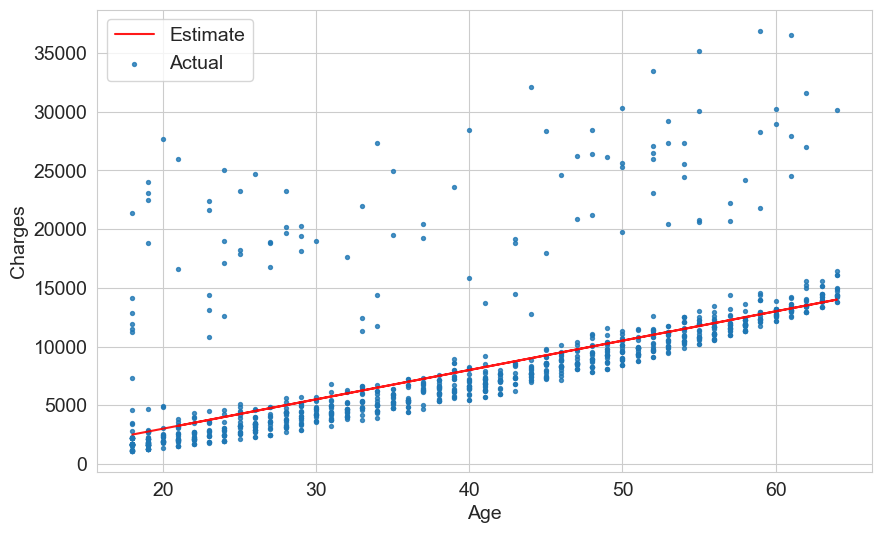

In [48]:
try_parameters(w, b)

In [49]:
non_smoker_df.age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [50]:
targets = non_smoker_df['charges']

In [51]:
rmse(targets, predicted)

np.float64(4705.696807404537)

In [52]:
# def try_parameters(w, b):
#     ages == non_smoker_df.age 
#     target = non_smoker_df.charges
#     predictions = estimate_charges(ages, w, b)

#     mlt.plot(ages, predictions, 'r', alpha=0.9)
#     mlt.scatter(ages, target, s=8, alpha=0.8)
#     mlt.xlabel('Age')
#     mlt.ylabel('Charges')
#     mlt.legend('Prediction', 'Actual')
loss = rmse(target, predictions)
print("RMSE LOSS: ", loss)

RMSE LOSS:  4705.696807404537


In [53]:

from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [56]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)


# the difference between 
# inputs = non_smoker_df['age'] 
# and 
# inputs = non_smoker_df[['age']]

# is [] this is the Series (1D) and [[]] this is the DataFrame(2D)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [57]:
type(inputs)

pandas.core.frame.DataFrame

In [58]:
model.fit(inputs, targets)

LinearRegression()

In [59]:
model.predict(np.array([[23], [37], [61]]))

c:\Users\Anooj Dilip Archana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [60]:
predictions = model.predict(inputs)

In [61]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [62]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [63]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [64]:
#w
model.coef_

array([267.24891283])

In [65]:
#b
model.intercept_

np.float64(-2091.4205565650864)

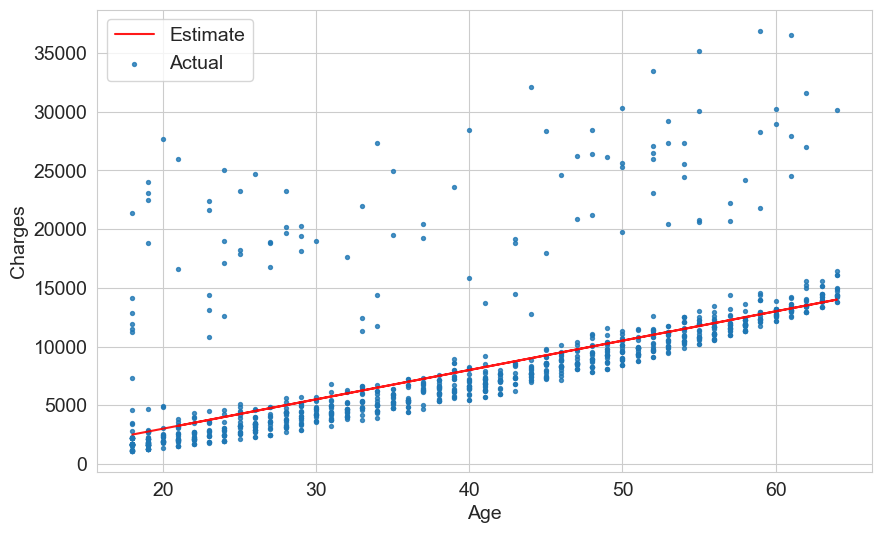

In [66]:
try_parameters(model.coef_, model.intercept_)

In [67]:
#Create inputs and targets 
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate prediction 
predictions = model.predict(inputs)

#Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


<h2> Linear Regression Using Multiple Features </h2>

so far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforwad. We simply assume the following realtionship:

charges = w1 X age + w2 + bmi + b

here, w1 & w2 are weeights and b is the intercept.

In [68]:
#Create inputs and targets 
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate prediction 
predictions = model.predict(inputs)

#Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [69]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [70]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [71]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

'childrens' which seems to have some correlation with 'charges'

In [72]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [73]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='children v/s charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [74]:
#Create inputs and targets 
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

#create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate prediction 
predictions = model.predict(inputs)

#Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [75]:
#Create inputs and targets 
inputs, targets = df[['age', 'bmi', 'children']], df['charges']

#create and train the model 
model = LinearRegression().fit(inputs, targets)

#Generate prediction 
predictions = model.predict(inputs)

#Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [76]:
px.scatter(df, x='age', y='charges', color='smoker')